#  Understand the Objective
- The objective is to design an IDSS that integrates intelligent decision-making methods to solve a specific problem. The assignment has three parts:

1. Background Analysis
2. Conceptual Design
3. Implementation Feasibility

# --------------------------------------------



# Background Analysis 
1. Describe the Problem

 One of the key challenges in healthcare is reducing patient no-shows for appointments. When patients fail to show up for scheduled appointments, it leads to inefficiencies in resource utilization, affecting both patient care and the financial health of healthcare providers. A no-show can be caused by various factors like forgetfulness, transportation issues, or scheduling conflicts.
Importance: Addressing this issue is critical for the following reasons:

- Resource Utilization: Healthcare providers often have limited staff and facilities. Missed appointments waste valuable resources that could have been allocated to other patients.
- Operational Efficiency: Frequent no-shows disrupt the smooth operation of healthcare practices, leading to delays in patient care.
- Revenue Loss: Healthcare providers lose revenue from missed appointments, which also results in longer wait times for patients.
- Improved Access to Care: Reducing no-shows can open up more appointment slots, improving access to care for patients in need.

2. Challenges

- Data Collection: One of the main challenges in addressing no-show rates is the difficulty in gathering and analyzing relevant data. Healthcare systems often store patient data in various formats, requiring data cleaning and preprocessing.
- Predicting No-Shows: Human behavior is unpredictable, and many factors influence whether a patient shows up for their appointment. These factors include medical conditions, communication preferences, and social factors such as transportation and work schedules.
- Implementation: Integrating an intelligent decision support system (IDSS) into existing healthcare infrastructure may face resistance from staff or require significant financial investment for new technology.


# -----------------------------------------------

#  Conceptual Design 

2.1 Data Collection & Preprocessing
- Step 1: Data Collection (Load Data)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('.csv')

# Display the first 5 rows of the data
print(data.head())


   PatientId AppointmentDay ScheduledDay  Age  Scholarship  SMS_received  \
0          1     2025-02-22    2025-02-4   56            0             0   
1          2     2025-02-19    2025-02-3    6            0             1   
2          3     2025-02-13    2025-02-4   88            0             1   
3          4     2025-02-17    2025-02-9   39            0             0   
4          5     2025-02-13    2025-02-2    7            1             1   

  No-show  
0     Yes  
1     Yes  
2     Yes  
3      No  
4     Yes  


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PatientId       1000 non-null   int64 
 1   AppointmentDay  1000 non-null   object
 2   ScheduledDay    1000 non-null   object
 3   Age             1000 non-null   int64 
 4   Scholarship     1000 non-null   int64 
 5   SMS_received    1000 non-null   int64 
 6   No-show         1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


- Step 2: Data Cleaning and Preprocessing 

In [3]:
# Convert date columns to datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

# Remove rows where there's missing data for 'No-show'
data = data.dropna(subset=['No-show'])

# Create a new column for waiting time (difference between scheduled and appointment days)
data['WaitingTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Remove any invalid records where WaitingTime is negative
data = data[data['WaitingTime'] >= 0]

# Display the cleaned data
print(data.head())


   PatientId AppointmentDay ScheduledDay  Age  Scholarship  SMS_received  \
0          1     2025-02-22   2025-02-04   56            0             0   
1          2     2025-02-19   2025-02-03    6            0             1   
2          3     2025-02-13   2025-02-04   88            0             1   
3          4     2025-02-17   2025-02-09   39            0             0   
4          5     2025-02-13   2025-02-02    7            1             1   

  No-show  WaitingTime  
0     Yes           18  
1     Yes           16  
2     Yes            9  
3      No            8  
4     Yes           11  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       1000 non-null   int64         
 1   AppointmentDay  1000 non-null   datetime64[ns]
 2   ScheduledDay    1000 non-null   datetime64[ns]
 3   Age             1000 non-null   int64         
 4   Scholarship     1000 non-null   int64         
 5   SMS_received    1000 non-null   int64         
 6   No-show         1000 non-null   object        
 7   WaitingTime     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 62.6+ KB


2.2 Exploratory Data Analysis (EDA)
- Step 3: Analyze No-show Distribution
    - visualize the distribution of no-shows (patients who missed their appointments).

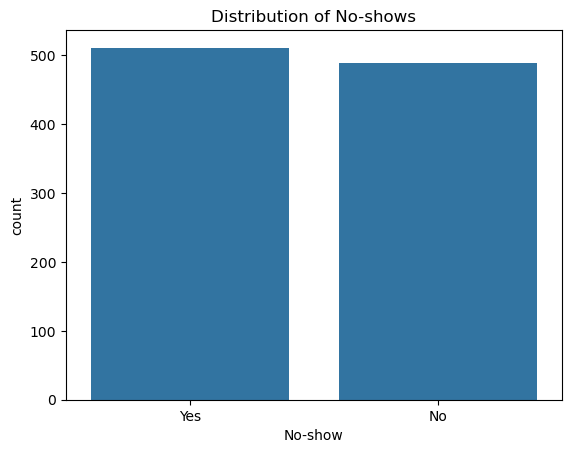

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of No-shows
sns.countplot(x='No-show', data=data)
plt.title('Distribution of No-shows')
plt.show()


- Step 4: Visualize Waiting Time
     - look at the waiting time distribution to understand how long patients wait before their appointments.

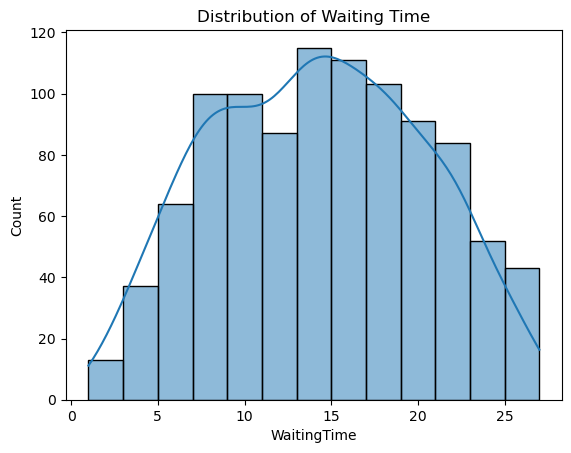

In [6]:
# Plotting the distribution of waiting time
sns.histplot(data['WaitingTime'], kde=True)
plt.title('Distribution of Waiting Time')
plt.show()


# ---------------------------------------------

# Implementation Feasibility
- 3.1 Data Modeling (Predict No-shows using Machine Learning)
    - Step 5: Train a Machine Learning Model (Random Forest)
    - Random Forest Classifier to predict whether a patient will show up based on features such as age, waiting time, and other available data.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target variable
features = ['Age', 'WaitingTime', 'Scholarship', 'SMS_received']
X = data[features]
y = data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.47      0.50       106
           1       0.48      0.54      0.51        94

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



- 
    - Step 6: Evaluate Model Performance

In [8]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')


Confusion Matrix:
[[50 56]
 [43 51]]
Accuracy: 0.51


- 3.2 Create Smart Scheduling (Appointment Recommendation)
    - Step 7: Smart Scheduling based on No-show Probability
    -  After training the model,  predict the probability of no-shows for each patient and create a smart schedule where we prioritize patients less likely to miss their appointments.

In [17]:
# Predict the no-show probability for all patients
data['No-show_probability'] = model.predict_proba(X)[:, 1]

# Sort patients by the probability of showing up (ascending order)
schedule = data.sort_values(by='No-show_probability', ascending=True)

# Display the top 10 appointments with the lowest no-show probability
smart_schedule = schedule[['PatientId', 'AppointmentDay', 'No-show_probability']].head(10)
print("\nSmart Schedule \n(Top 10 Patients with Low No-show Probability)\n")
print(smart_schedule)



Smart Schedule 
(Top 10 Patients with Low No-show Probability)

     PatientId AppointmentDay  No-show_probability
531        532     2025-02-25             0.000000
596        597     2025-02-15             0.010000
92          93     2025-02-21             0.010000
6            7     2025-02-16             0.010000
905        906     2025-02-22             0.010000
561        562     2025-02-17             0.013333
640        641     2025-02-18             0.013333
967        968     2025-02-24             0.020000
937        938     2025-02-13             0.020000
622        623     2025-02-10             0.020000


# ------------------------------------------------------------------------------

# Evaluation and Results
- Step 7: Visualize Smart Scheduling
    - We will visualize the top 10 patients that are prioritized based on their likelihood to show up for their appointment.

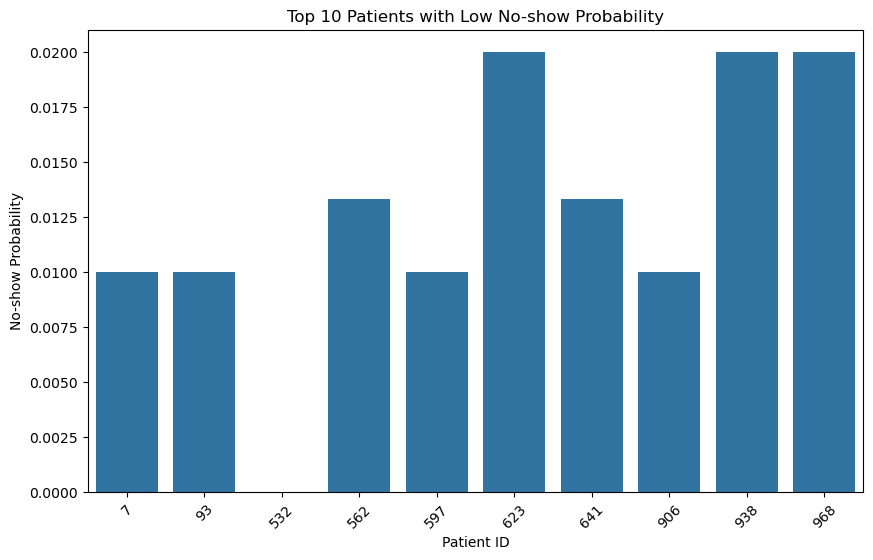

In [18]:
# Visualize the top 10 patients with the lowest no-show probability
plt.figure(figsize=(10, 6))
sns.barplot(x='PatientId', y='No-show_probability', data=smart_schedule)
plt.title('Top 10 Patients with Low No-show Probability')
plt.xlabel('Patient ID')
plt.ylabel('No-show Probability')
plt.xticks(rotation=45)
plt.show()
